In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
from scipy import stats
import pandas_profiling as pf

In [3]:
pip install -U seaborn

Requirement already up-to-date: seaborn in /home/arcgate/anaconda3/lib/python3.6/site-packages (0.11.2)
Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv("modify_train.csv")

In [5]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100000.0,8.063150e+04,4.330149e+04,5.634000e+03,4.313275e+04,8.063150e+04,1.181302e+05,1.556290e+05
Customer_ID,100000.0,2.598267e+04,1.434054e+04,1.006000e+03,1.366450e+04,2.577700e+04,3.838500e+04,5.099900e+04
Month,100000.0,4.500000e+00,2.291299e+00,1.000000e+00,2.750000e+00,4.500000e+00,6.250000e+00,8.000000e+00
Age,100000.0,3.331634e+01,1.076481e+01,1.400000e+01,2.400000e+01,3.300000e+01,4.200000e+01,5.600000e+01
SSN,100000.0,5.004617e+08,2.908267e+08,8.134900e+04,2.451686e+08,5.006886e+08,7.560027e+08,9.999934e+08
Annual_Income,100000.0,5.050512e+04,3.829942e+04,7.005930e+03,1.934297e+04,3.699971e+04,7.168347e+04,1.799873e+05
Monthly_Inhand_Salary,100000.0,4.197271e+03,3.186432e+03,3.036454e+02,1.626594e+03,3.095905e+03,5.957715e+03,1.520463e+04
Num_Bank_Accounts,100000.0,5.368610e+00,2.593789e+00,-1.000000e+00,3.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Num_Credit_Card,100000.0,5.533570e+00,2.067098e+00,0.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Interest_Rate,100000.0,1.453208e+01,8.741330e+00,1.000000e+00,7.000000e+00,1.300000e+01,2.000000e+01,3.400000e+01


##### KInd of Occupation

In [8]:
pd.DataFrame({"Distinct Occupation": df["Occupation"].unique()})

,Distinct Occupation
0,Scientist
1,Teacher
2,Engineer
3,Entrepreneur
4,Developer
5,Lawyer
6,Media_Manager
7,Doctor
8,Journalist
9,Manager


##### Different Type of Loan in Dataset

In [9]:
D = []
x = 0
for i in df["Type_of_Loan"].unique():
    x = i.split(',')
    for var in x:
        var = var.replace('and','').strip()
        if var not in D and var!='':
            D.append(var)
distinct_loan = pd.DataFrame({"Distinct Loan type " : D})

In [10]:
distinct_loan

,Distinct Loan type
0,Auto Loan
1,Credit-Builder Loan
2,Personal Loan
3,Home Equity Loan
4,Not Specified
5,NO DATA
6,Mortgage Loan
7,Student Loan
8,Debt Consolidation Loan
9,Payday Loan


##### Different type of Credit Mix

In [11]:
pd.DataFrame({"Distinct Credit_Mix":df["Credit_Mix"].unique()})

,Distinct Credit_Mix
0,Good
1,Standard
2,Bad


##### Different type of Payment Behaviour in dataset

In [12]:
pd.DataFrame({"Distinct Payment_Behaviour":df["Payment_Behaviour"].unique()})

,Distinct Payment_Behaviour
0,High_spent_Small_value_payments
1,Low_spent_Large_value_payments
2,Low_spent_Medium_value_payments
3,Low_spent_Small_value_payments
4,High_spent_Medium_value_payments
5,High_spent_Large_value_payments


##### Number of Null value

In [13]:
df.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

###  Exploratory data analysis

##### 1. Transaction in each month

In [14]:
month = df.Month.value_counts()
transactions = list(df.Month.value_counts())

In [15]:
# jo possible nahi h itna ana ye sab fake  accurate aara h 

In [16]:
pd.DataFrame({"Month":month,"Transactions":transactions})

,Month,Transactions
8,12500,12500
7,12500,12500
6,12500,12500
5,12500,12500
4,12500,12500
3,12500,12500
2,12500,12500
1,12500,12500


##### Visualization of Monthly transaction data

<AxesSubplot:title={'center':'Transaction in each month'}, xlabel='Month', ylabel='count'>

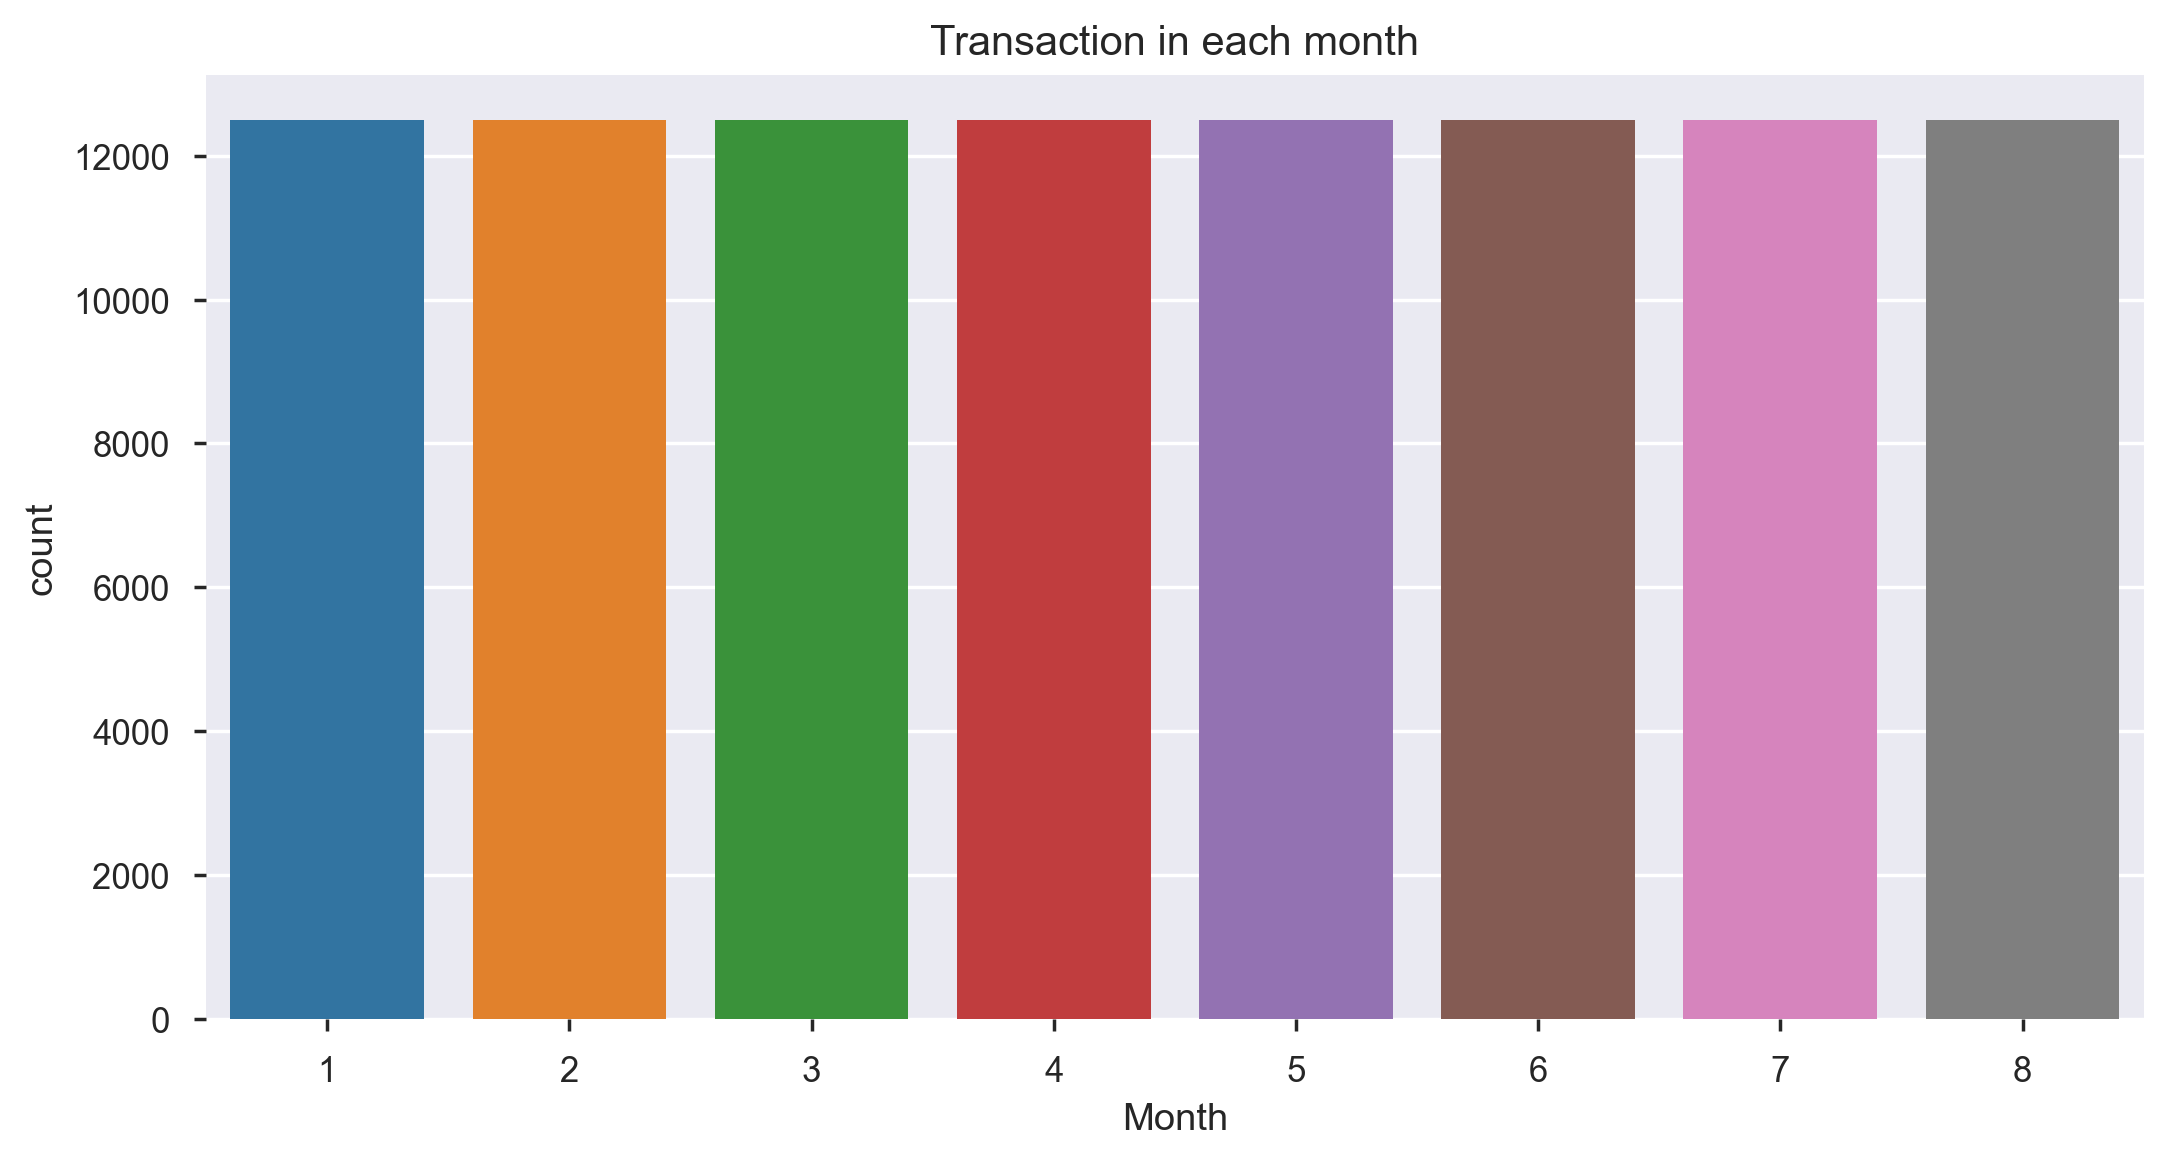

In [17]:
plt.figure(figsize=(10,5), dpi = 250)  # dpi for the resolution
plt.title("Transaction in each month")
sns.countplot(x= "Month", data =df)


##### Transaction according to age groups
* Filter out age group and make a fresh DataFrame

In [18]:
df["Age"].unique()

array([23., 28., 34., 54., 55., 21., 31., 33., 30., 24., 44., 45., 40.,
       41., 32., 35., 36., 39., 37., 20., 46., 26., 42., 19., 48., 38.,
       43., 22., 16., 18., 15., 27., 25., 14., 17., 47., 53., 56., 29.,
       49., 51., 50., 52.])

In [19]:
a = df["Age"].min()
b = df["Age"].max()
print("The min age {} and max age {} for credit card is : ".format(a,b))

The min age 14.0 and max age 56.0 for credit card is : 


In [20]:
x =df.Age.value_counts()

In [21]:
x

38.0    3070
28.0    3045
31.0    3037
26.0    3025
32.0    2969
36.0    2953
25.0    2952
27.0    2951
35.0    2940
39.0    2927
34.0    2922
44.0    2902
22.0    2890
19.0    2875
41.0    2865
20.0    2833
37.0    2832
29.0    2823
43.0    2809
30.0    2807
21.0    2792
24.0    2789
23.0    2719
45.0    2712
40.0    2695
42.0    2643
33.0    2623
18.0    2427
46.0    1670
15.0    1615
17.0    1551
16.0    1505
49.0    1419
48.0    1416
55.0    1395
53.0    1394
52.0    1388
54.0    1342
51.0    1332
50.0    1305
47.0    1265
14.0    1197
56.0     379
Name: Age, dtype: int64

In [22]:
# total no. of counts in between 21 to 30
df[(df["Age"]>=21) & (df["Age"]<31)]["Age"].value_counts().sum()

28793

In [23]:
age ={}
x= 0
ages = df.Age.value_counts()
for i in range(14,57):
    x += ages[i]
    if i ==20:
        age['14-20'] = x
        x = 0
    elif i==30:
        age['21-30'] = x
        x = 0
    elif i==40:
        age['31-40'] = x
        x= 0
    elif i==50:
        age['41-50'] = x
        x = 0
    elif i==56:
        age['51-56']  = x
        
group_age = pd.DataFrame({'Age_b/w':age.keys(),'Total_Persons':age.values()})
group_age

,Age_b/w,Total_Persons
0,14-20,14003
1,21-30,28793
2,31-40,28968
3,41-50,21006
4,51-56,7230


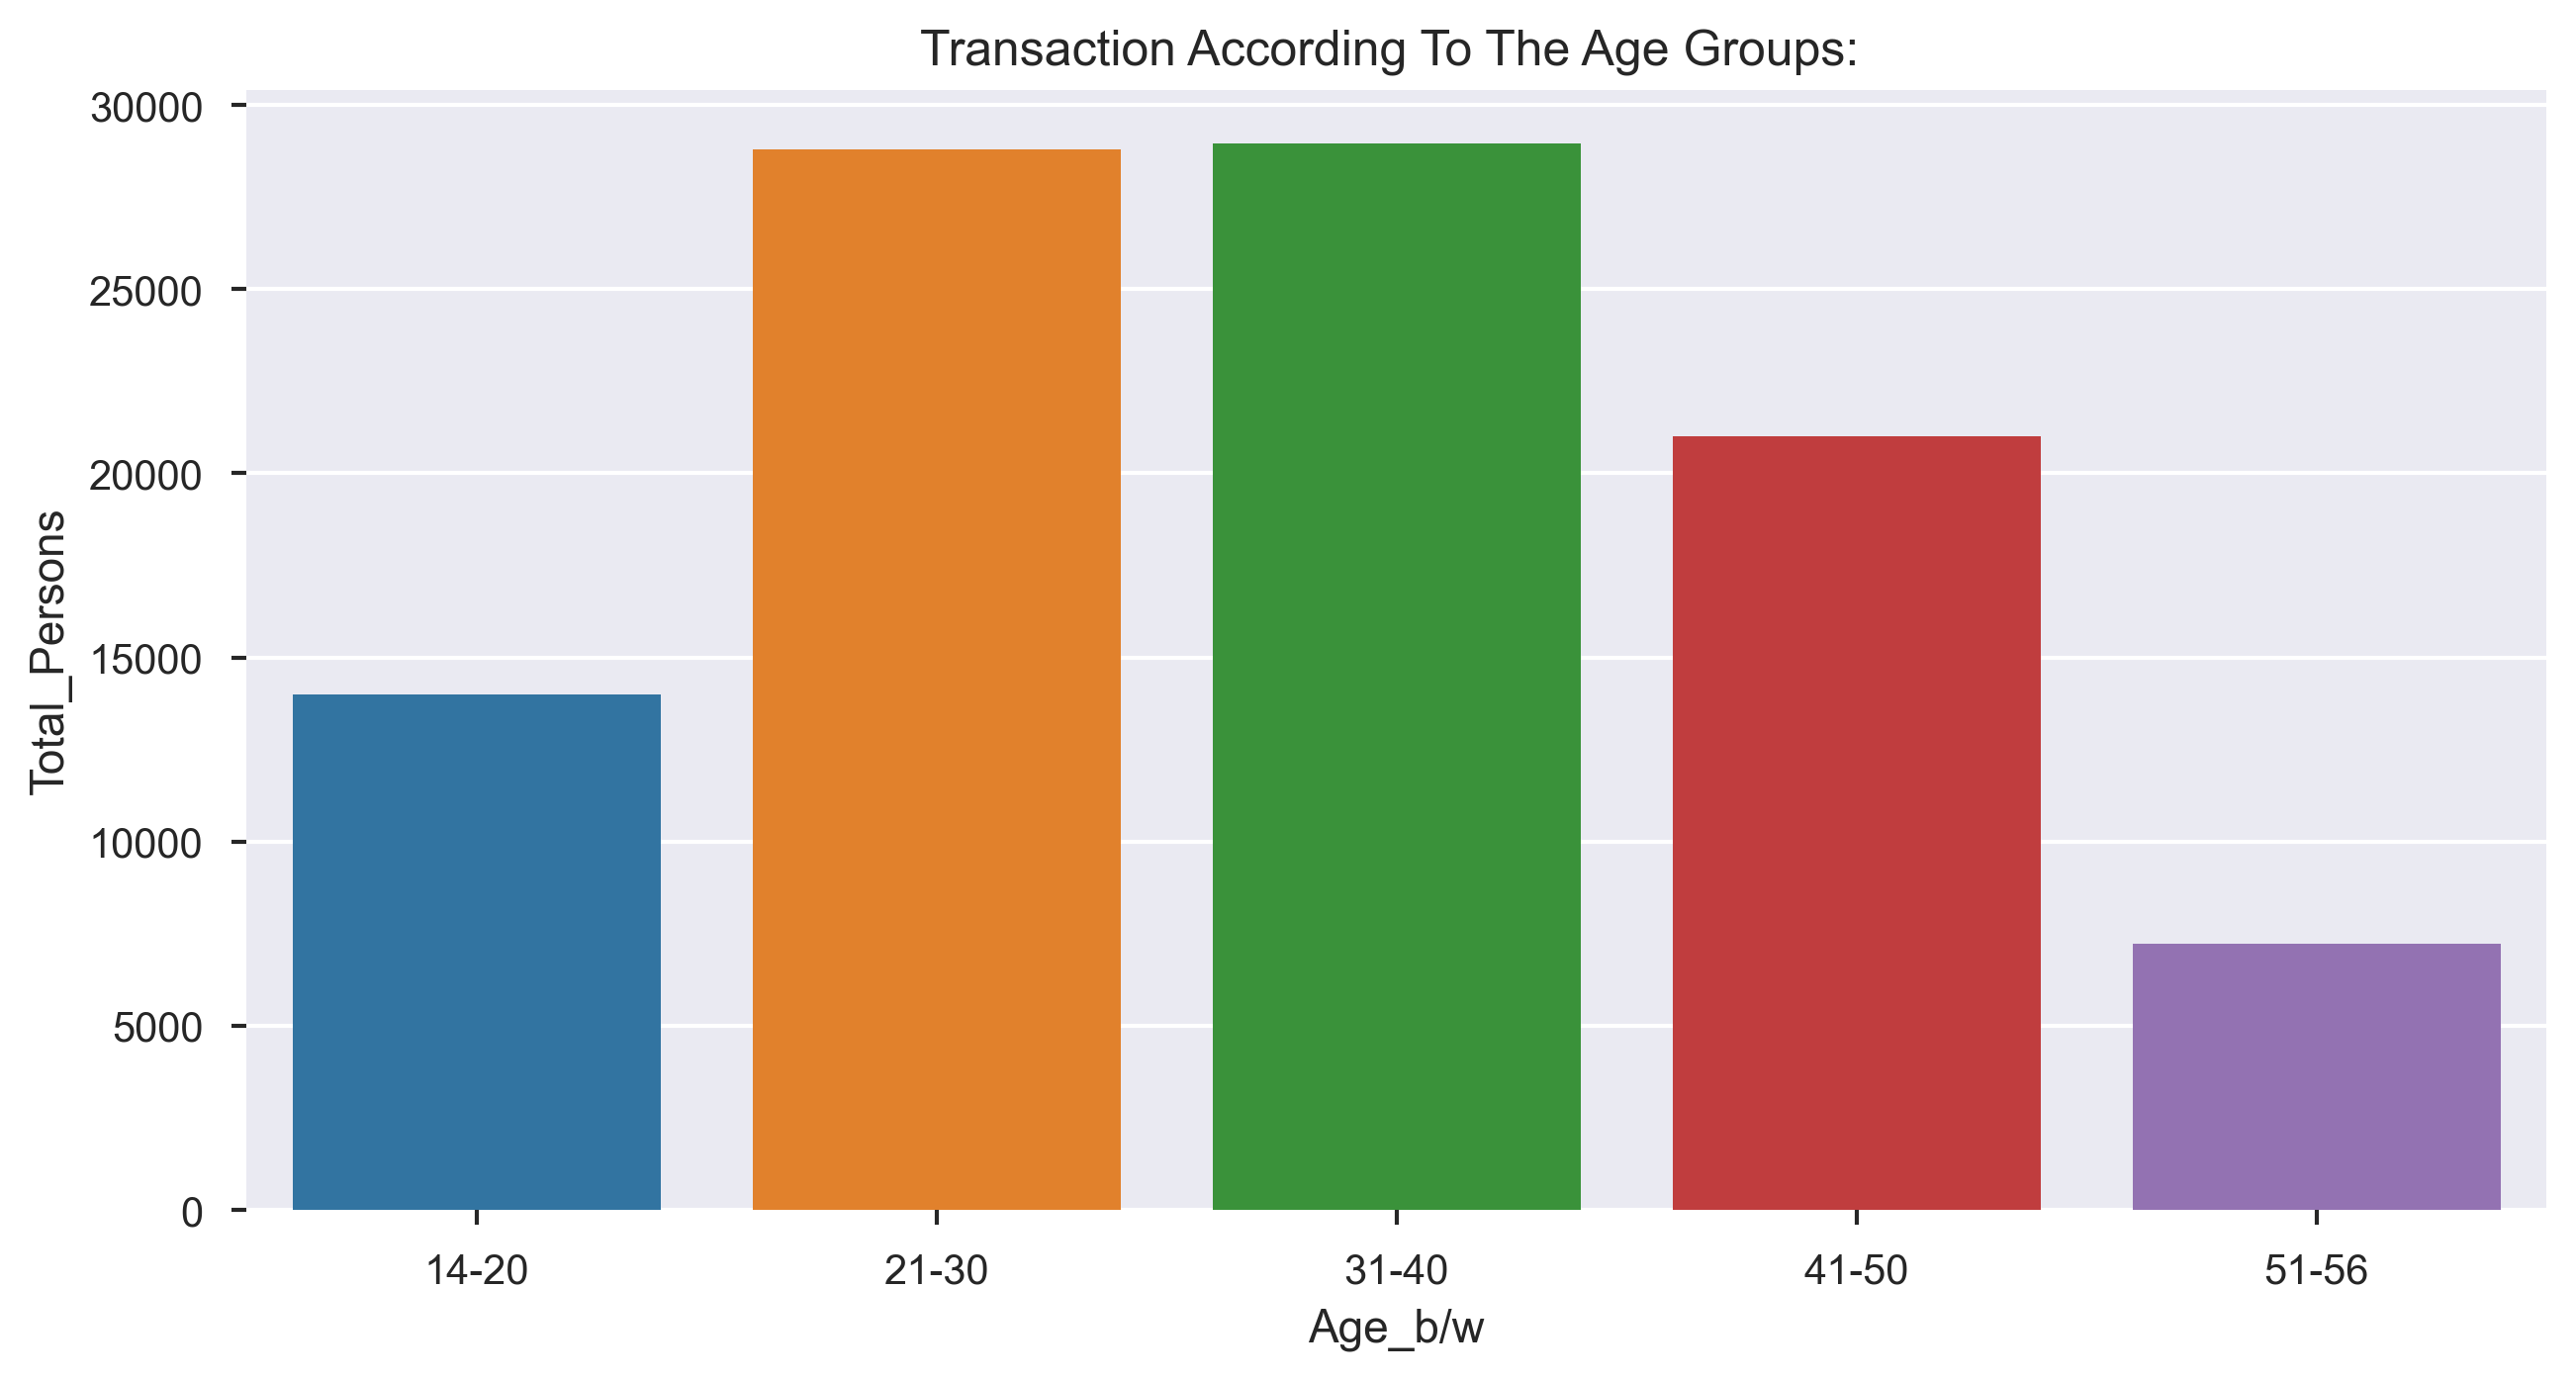

In [24]:
plt.figure(figsize=(10,5),dpi = 300)
plt.title("Transaction According To The Age Groups: ")
sns.barplot(data = group_age , x = 'Age_b/w',y = "Total_Persons")
plt.show()

##### Income Distribution for each Occupations

In [25]:
# "Occupation" with "Annual Income"
df[["Occupation","Annual_Income"]]

,Occupation,Annual_Income
0,Scientist,19114.12
1,Scientist,19114.12
2,Scientist,19114.12
3,Scientist,19114.12
4,Scientist,19114.12
...,...,...
99995,Mechanic,39628.99
99996,Mechanic,39628.99
99997,Mechanic,39628.99
99998,Mechanic,39628.99


In [26]:
Distribution = df[["Occupation","Annual_Income"]].groupby("Occupation").sum().reset_index()
Distribution

,Occupation,Annual_Income
0,Accountant,3.420970e+08
1,Architect,3.539977e+08
2,Developer,3.368630e+08
3,Doctor,3.252326e+08
4,Engineer,3.482152e+08
5,Entrepreneur,3.389662e+08
6,Journalist,3.165391e+08
7,Lawyer,3.519206e+08
8,Manager,3.310343e+08
9,Mechanic,3.394444e+08


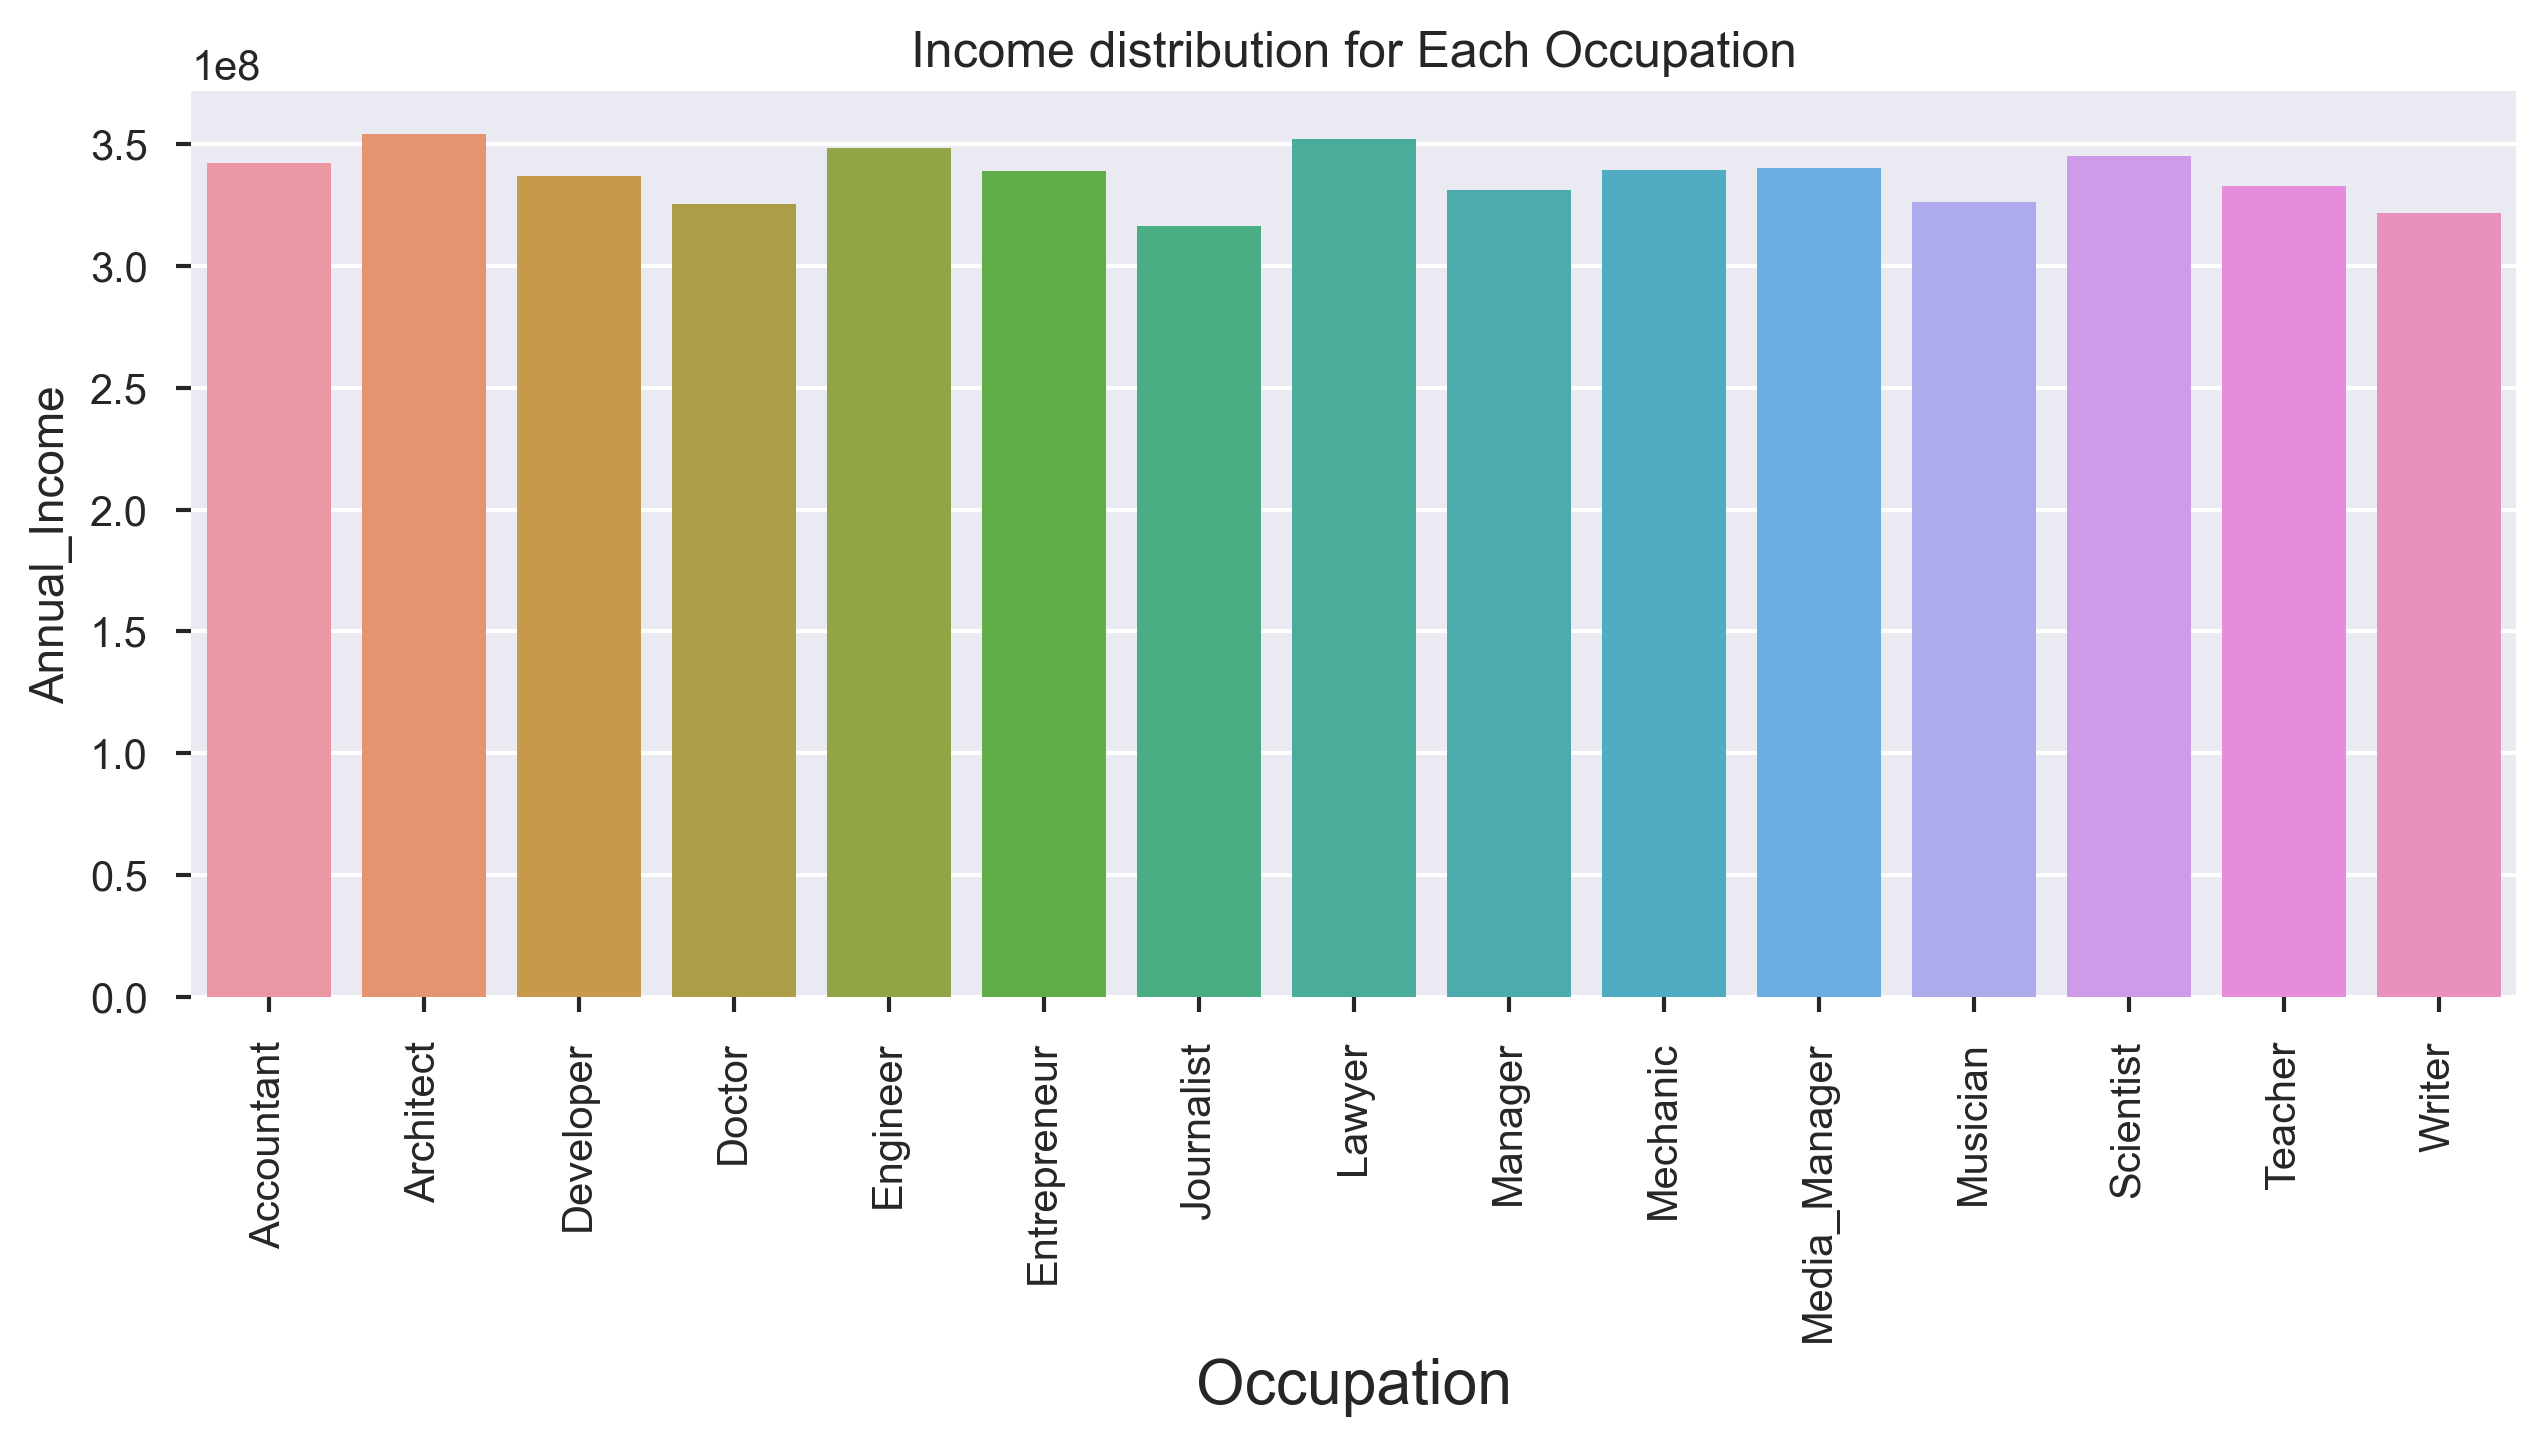

In [27]:
plt.figure(figsize = (10,4),dpi = 300)
plt.xticks(rotation = 90)
plt.title("Income distribution for Each Occupation")
sns.barplot(data = Distribution, x= "Occupation",y= "Annual_Income")
plt.xlabel("Occupation",size = 15)
plt.show()

##### Bank account distribution for each age groups
* In case filter out the no.of age groups contain bank accounts

In [28]:
df.groupby("Age")["Num_Bank_Accounts"].sum()

Age
14.0     8116.0
15.0    11105.0
16.0    10021.0
17.0    10391.0
18.0    13843.0
19.0    15925.0
20.0    15473.0
21.0    15581.0
22.0    15610.0
23.0    15010.0
24.0    15515.0
25.0    16796.0
26.0    17023.0
27.0    16596.0
28.0    16908.0
29.0    15575.0
30.0    15051.0
31.0    17272.0
32.0    16304.0
33.0    13637.0
34.0    16029.0
35.0    15493.0
36.0    16353.0
37.0    15991.0
38.0    17069.0
39.0    15878.0
40.0    14924.0
41.0    15456.0
42.0    14430.0
43.0    15911.0
44.0    15749.0
45.0    15013.0
46.0     7804.0
47.0     4827.0
48.0     5599.0
49.0     5207.0
50.0     4866.0
51.0     5210.0
52.0     5691.0
53.0     5497.0
54.0     5138.0
55.0     5487.0
56.0     1487.0
Name: Num_Bank_Accounts, dtype: float64

In [29]:
b = df.groupby("Age")["Num_Bank_Accounts"].sum()
x = 0
Age_wise_account = {}

for i in b.index:
    x += b[i]
    if i == 20:
        Age_wise_account['14-20'] = x
        x = 0
    elif i == 30:
        Age_wise_account['21-30'] = x
        x = 0
    elif i == 40:
        Age_wise_account['31-40'] = x
        x = 0
    elif i == 50:
        Age_wise_account['41-50'] = x
        x = 0
    elif i == 56:
        Age_wise_account['51-56'] = x
        x = 0
        
Distribution = pd.DataFrame({"Age_Group":Age_wise_account.keys(),"Num_Bank_Accounts":Age_wise_account.values()})
Distribution

,Age_Group,Num_Bank_Accounts
0,14-20,84874.0
1,21-30,159665.0
2,31-40,158950.0
3,41-50,104862.0
4,51-56,28510.0


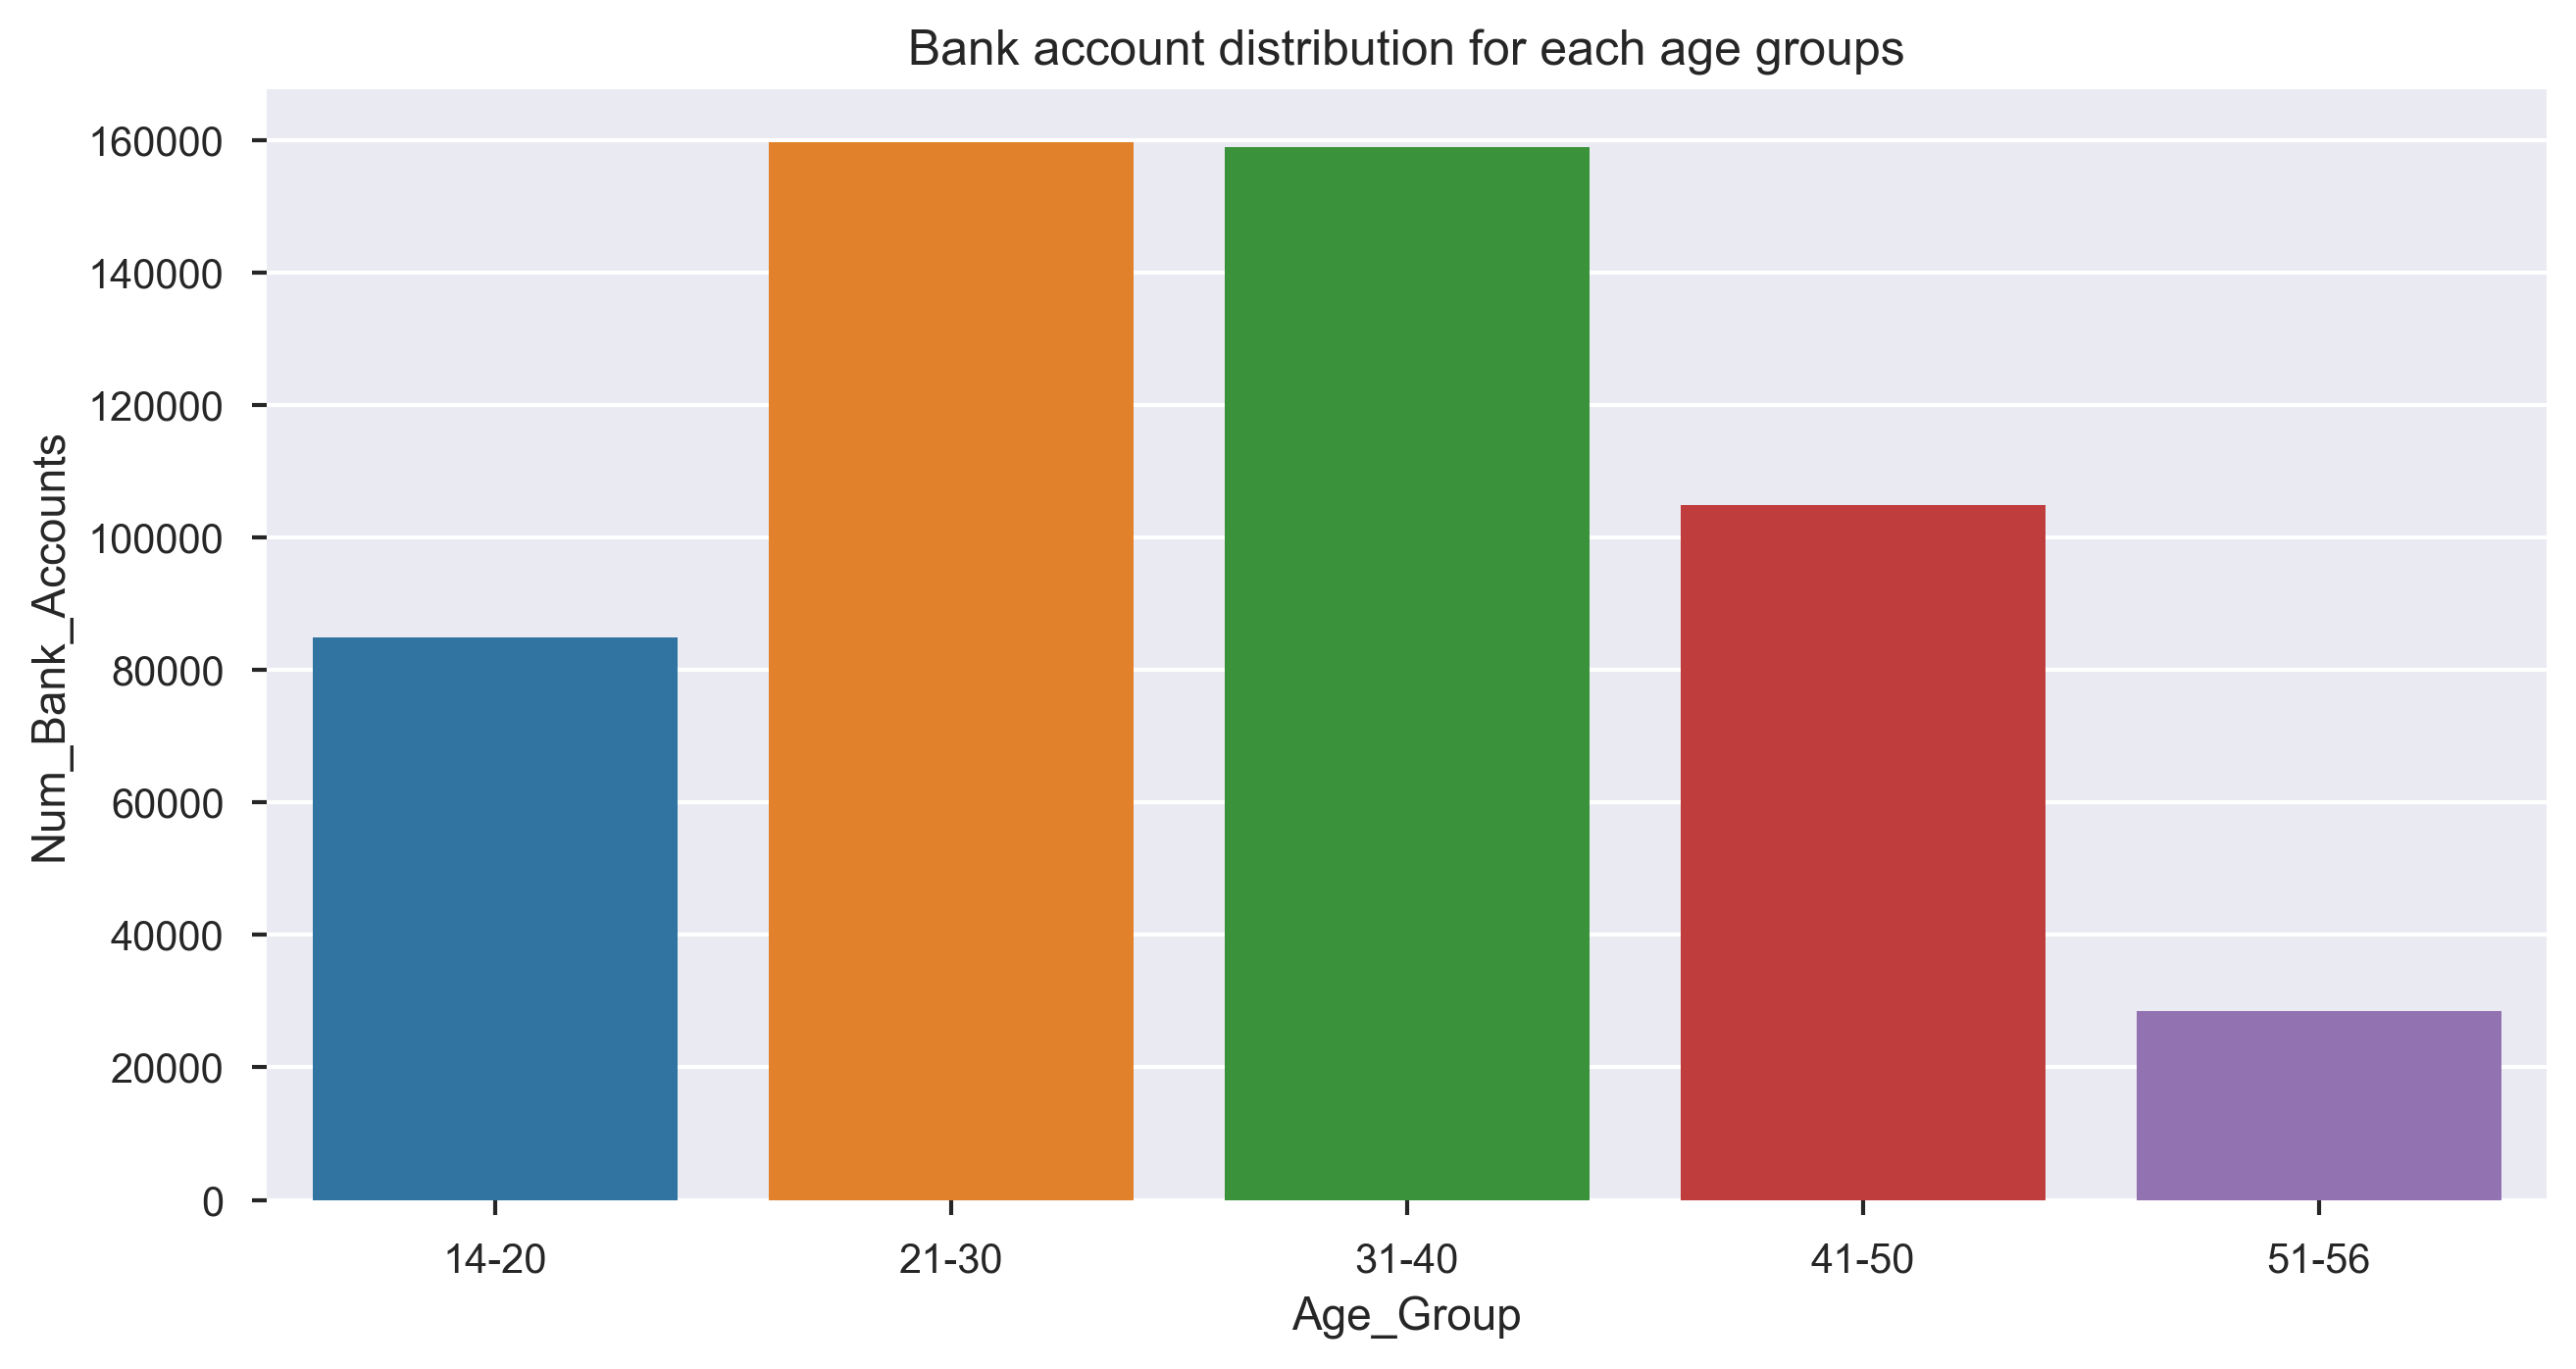

In [30]:
plt.figure(figsize=(10,5),dpi=300)
plt.title("Bank account distribution for each age groups")
sns.barplot(data = Distribution, x = "Age_Group",y = "Num_Bank_Accounts")
plt.show()

##### Credit Card Distribution For Each Age Group
* Filter out number of credit card for each age group

In [31]:
df["Num_Credit_Card"].value_counts()

5.0     18903
7.0     17024
6.0     16932
4.0     14362
3.0     13560
8.0      5073
10.0     4962
9.0      4753
2.0      2196
1.0      2185
11.0       36
0.0        14
Name: Num_Credit_Card, dtype: int64

In [32]:
df["Num_Credit_Card"].unique().sum()

66.0

In [33]:
print("Max",df["Num_Credit_Card"].max())
print("Min",df["Num_Credit_Card"].min())

Max 11.0
Min 0.0


In [34]:
# compare the no. of credit card contain by the person in age group
c = df.groupby("Age")["Num_Credit_Card"].sum()
x = 0
Age_wise_CreditCard = {}

for i in c.index:
    x += c[i]
    if i == 20:
        Age_wise_CreditCard['14-20'] = x
        x = 0
    elif i == 30:
        Age_wise_CreditCard['21-30'] = x
        x = 0
    elif i == 40:
        Age_wise_CreditCard['31-40'] = x
        x = 0
    elif i == 50:
        Age_wise_CreditCard['41-50'] = x
        x = 0
    elif i == 56:
        Age_wise_CreditCard['51-56'] = x
        x = 0
        
Distribution = pd.DataFrame({"Age_Group":Age_wise_CreditCard.keys(),"Num_Bank_CreditCard":Age_wise_CreditCard.values()})
Distribution

,Age_Group,Num_Bank_CreditCard
0,14-20,83626.0
1,21-30,161557.0
2,31-40,163784.0
3,41-50,110953.0
4,51-56,33437.0


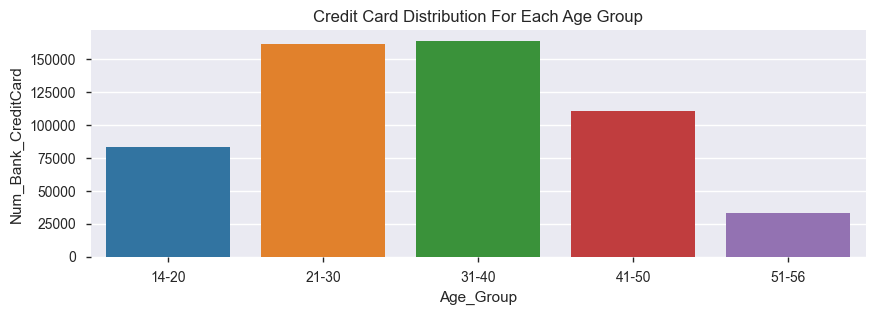

In [35]:
plt.figure(figsize=(10,3),dpi = 100)
plt.title("Credit Card Distribution For Each Age Group")
sns.barplot(data = Distribution, x = "Age_Group",y = "Num_Bank_CreditCard")
plt.show()

### Relationship b/w "Bank Account "distribution and "Credit Card Distribution" in Data along with "Occupation"

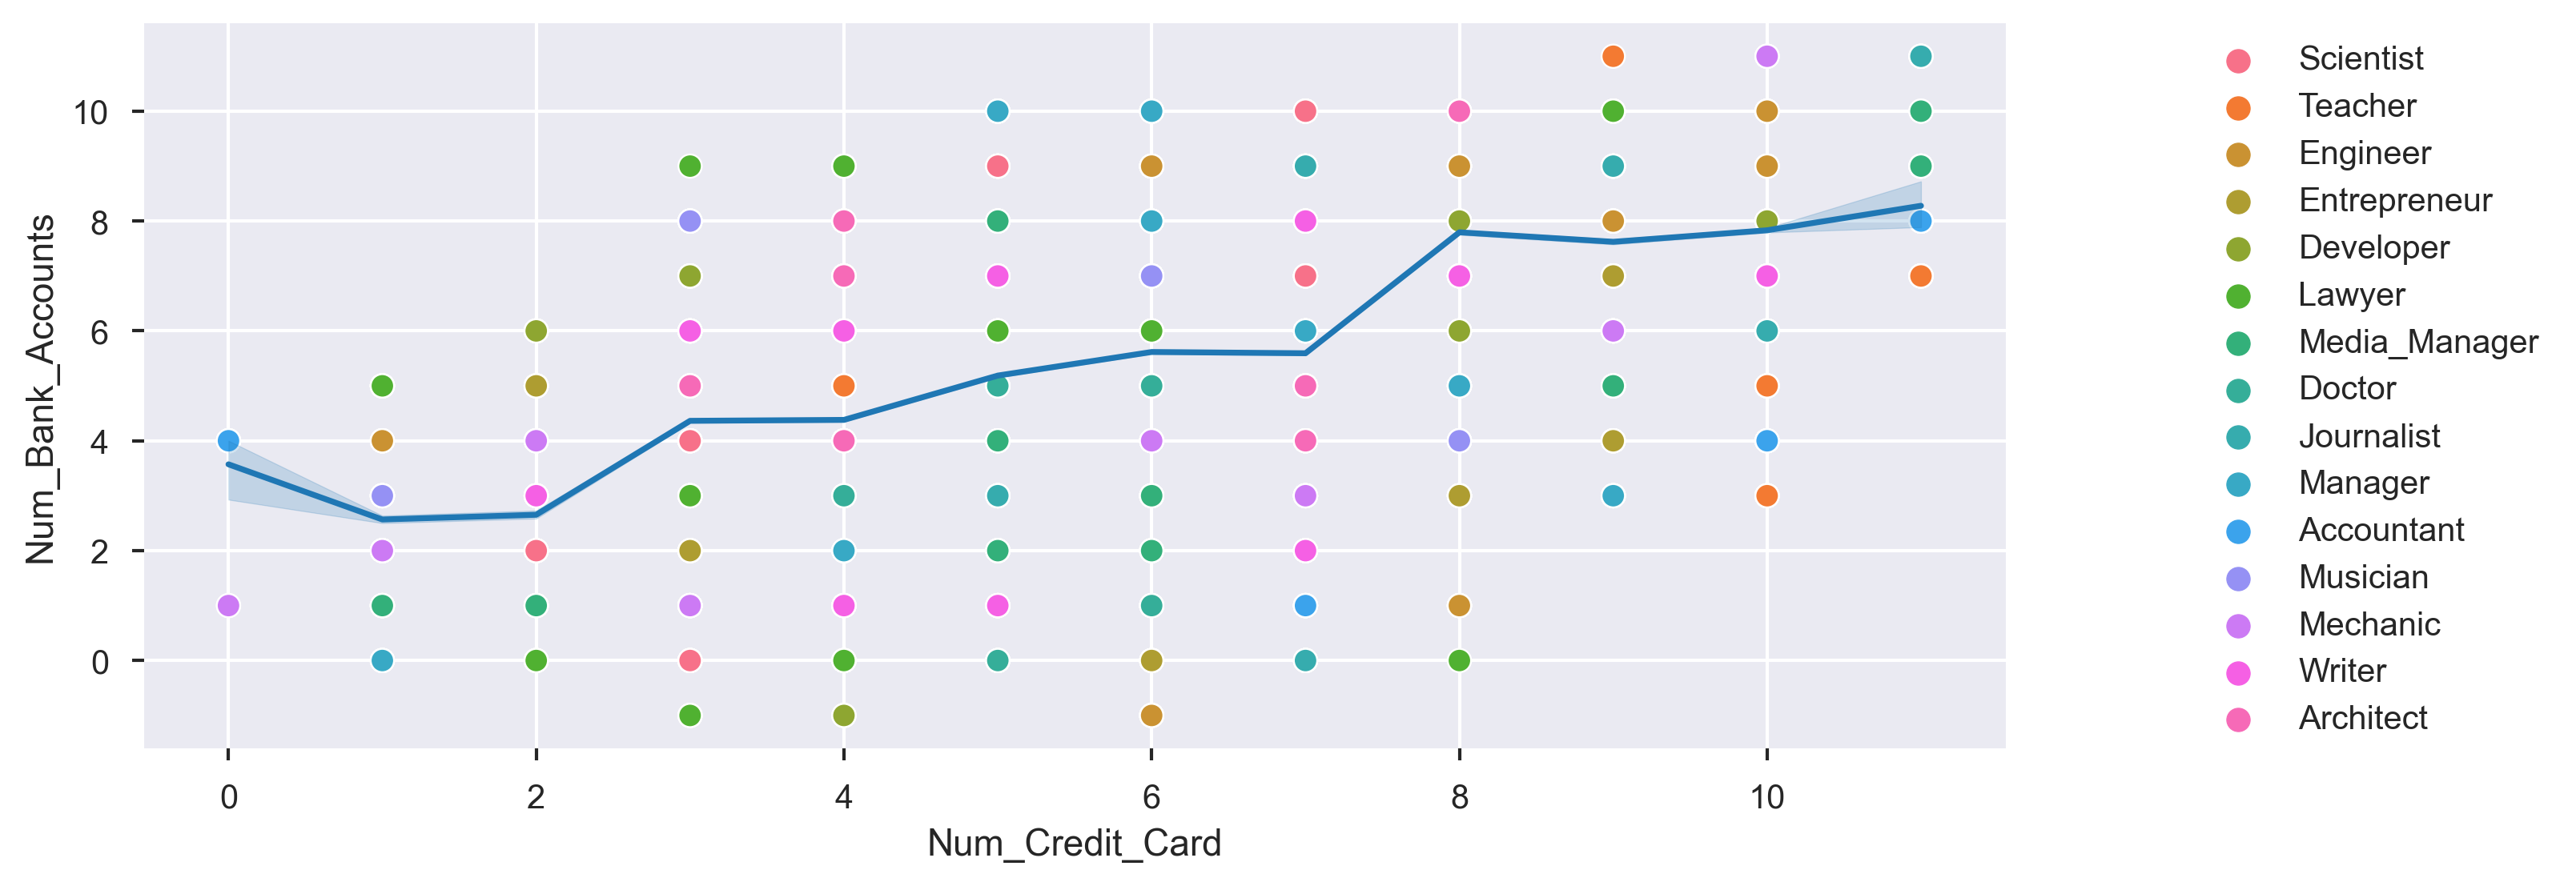

In [36]:
plt.figure(figsize = (10,4), dpi = 300)
sns.scatterplot(data = df , x = "Num_Credit_Card",y = "Num_Bank_Accounts",hue = "Occupation",)
sns.lineplot(data = df, x = "Num_Credit_Card",y="Num_Bank_Accounts")
plt.legend(loc = (1.1,0))  
plt.show()


* In this graph Observed that Correlation between number of Credit card and Number of Bank Accounts and i got a Positive Correlation b/w denoted by a line graph

In [37]:
df[["Num_Credit_Card","Num_Bank_Accounts"]]

,Num_Credit_Card,Num_Bank_Accounts
0,4.0,3.0
1,4.0,3.0
2,4.0,3.0
3,4.0,3.0
4,4.0,3.0
...,...,...
99995,6.0,4.0
99996,6.0,4.0
99997,6.0,4.0
99998,6.0,4.0


##### Distribution of Each Loan Type
* Filter out total num of each loan

In [38]:
D = []
x = 0
for i in df["Type_of_Loan"].unique():
    x = i.split(',')
    for var in x:
        var = var.replace('and','').strip()
        if var not in D and var!='':
            D.append(var)
distinct_loan = pd.DataFrame({"Distinct Loan type" : D})
distinct_loan

,Distinct Loan type
0,Auto Loan
1,Credit-Builder Loan
2,Personal Loan
3,Home Equity Loan
4,Not Specified
5,NO DATA
6,Mortgage Loan
7,Student Loan
8,Debt Consolidation Loan
9,Payday Loan


In [39]:
num_of_each_loan = [[],[]]
for i in distinct_loan["Distinct Loan type"]:
    a = 0 
    for x in df['Type_of_Loan']:
        if i in x:
            a  = a + x.count(i)
    num_of_each_loan[0].append(i)
    num_of_each_loan[1].append(a)
total_num_of_each_loan = pd.DataFrame({'Loan_type':num_of_each_loan[0],'Total_Number': num_of_each_loan[1]})
total_num_of_each_loan

,Loan_type,Total_Number
0,Auto Loan,37992
1,Credit-Builder Loan,40440
2,Personal Loan,38888
3,Home Equity Loan,39104
4,Not Specified,39616
5,NO DATA,11408
6,Mortgage Loan,38936
7,Student Loan,38968
8,Debt Consolidation Loan,38776
9,Payday Loan,40568


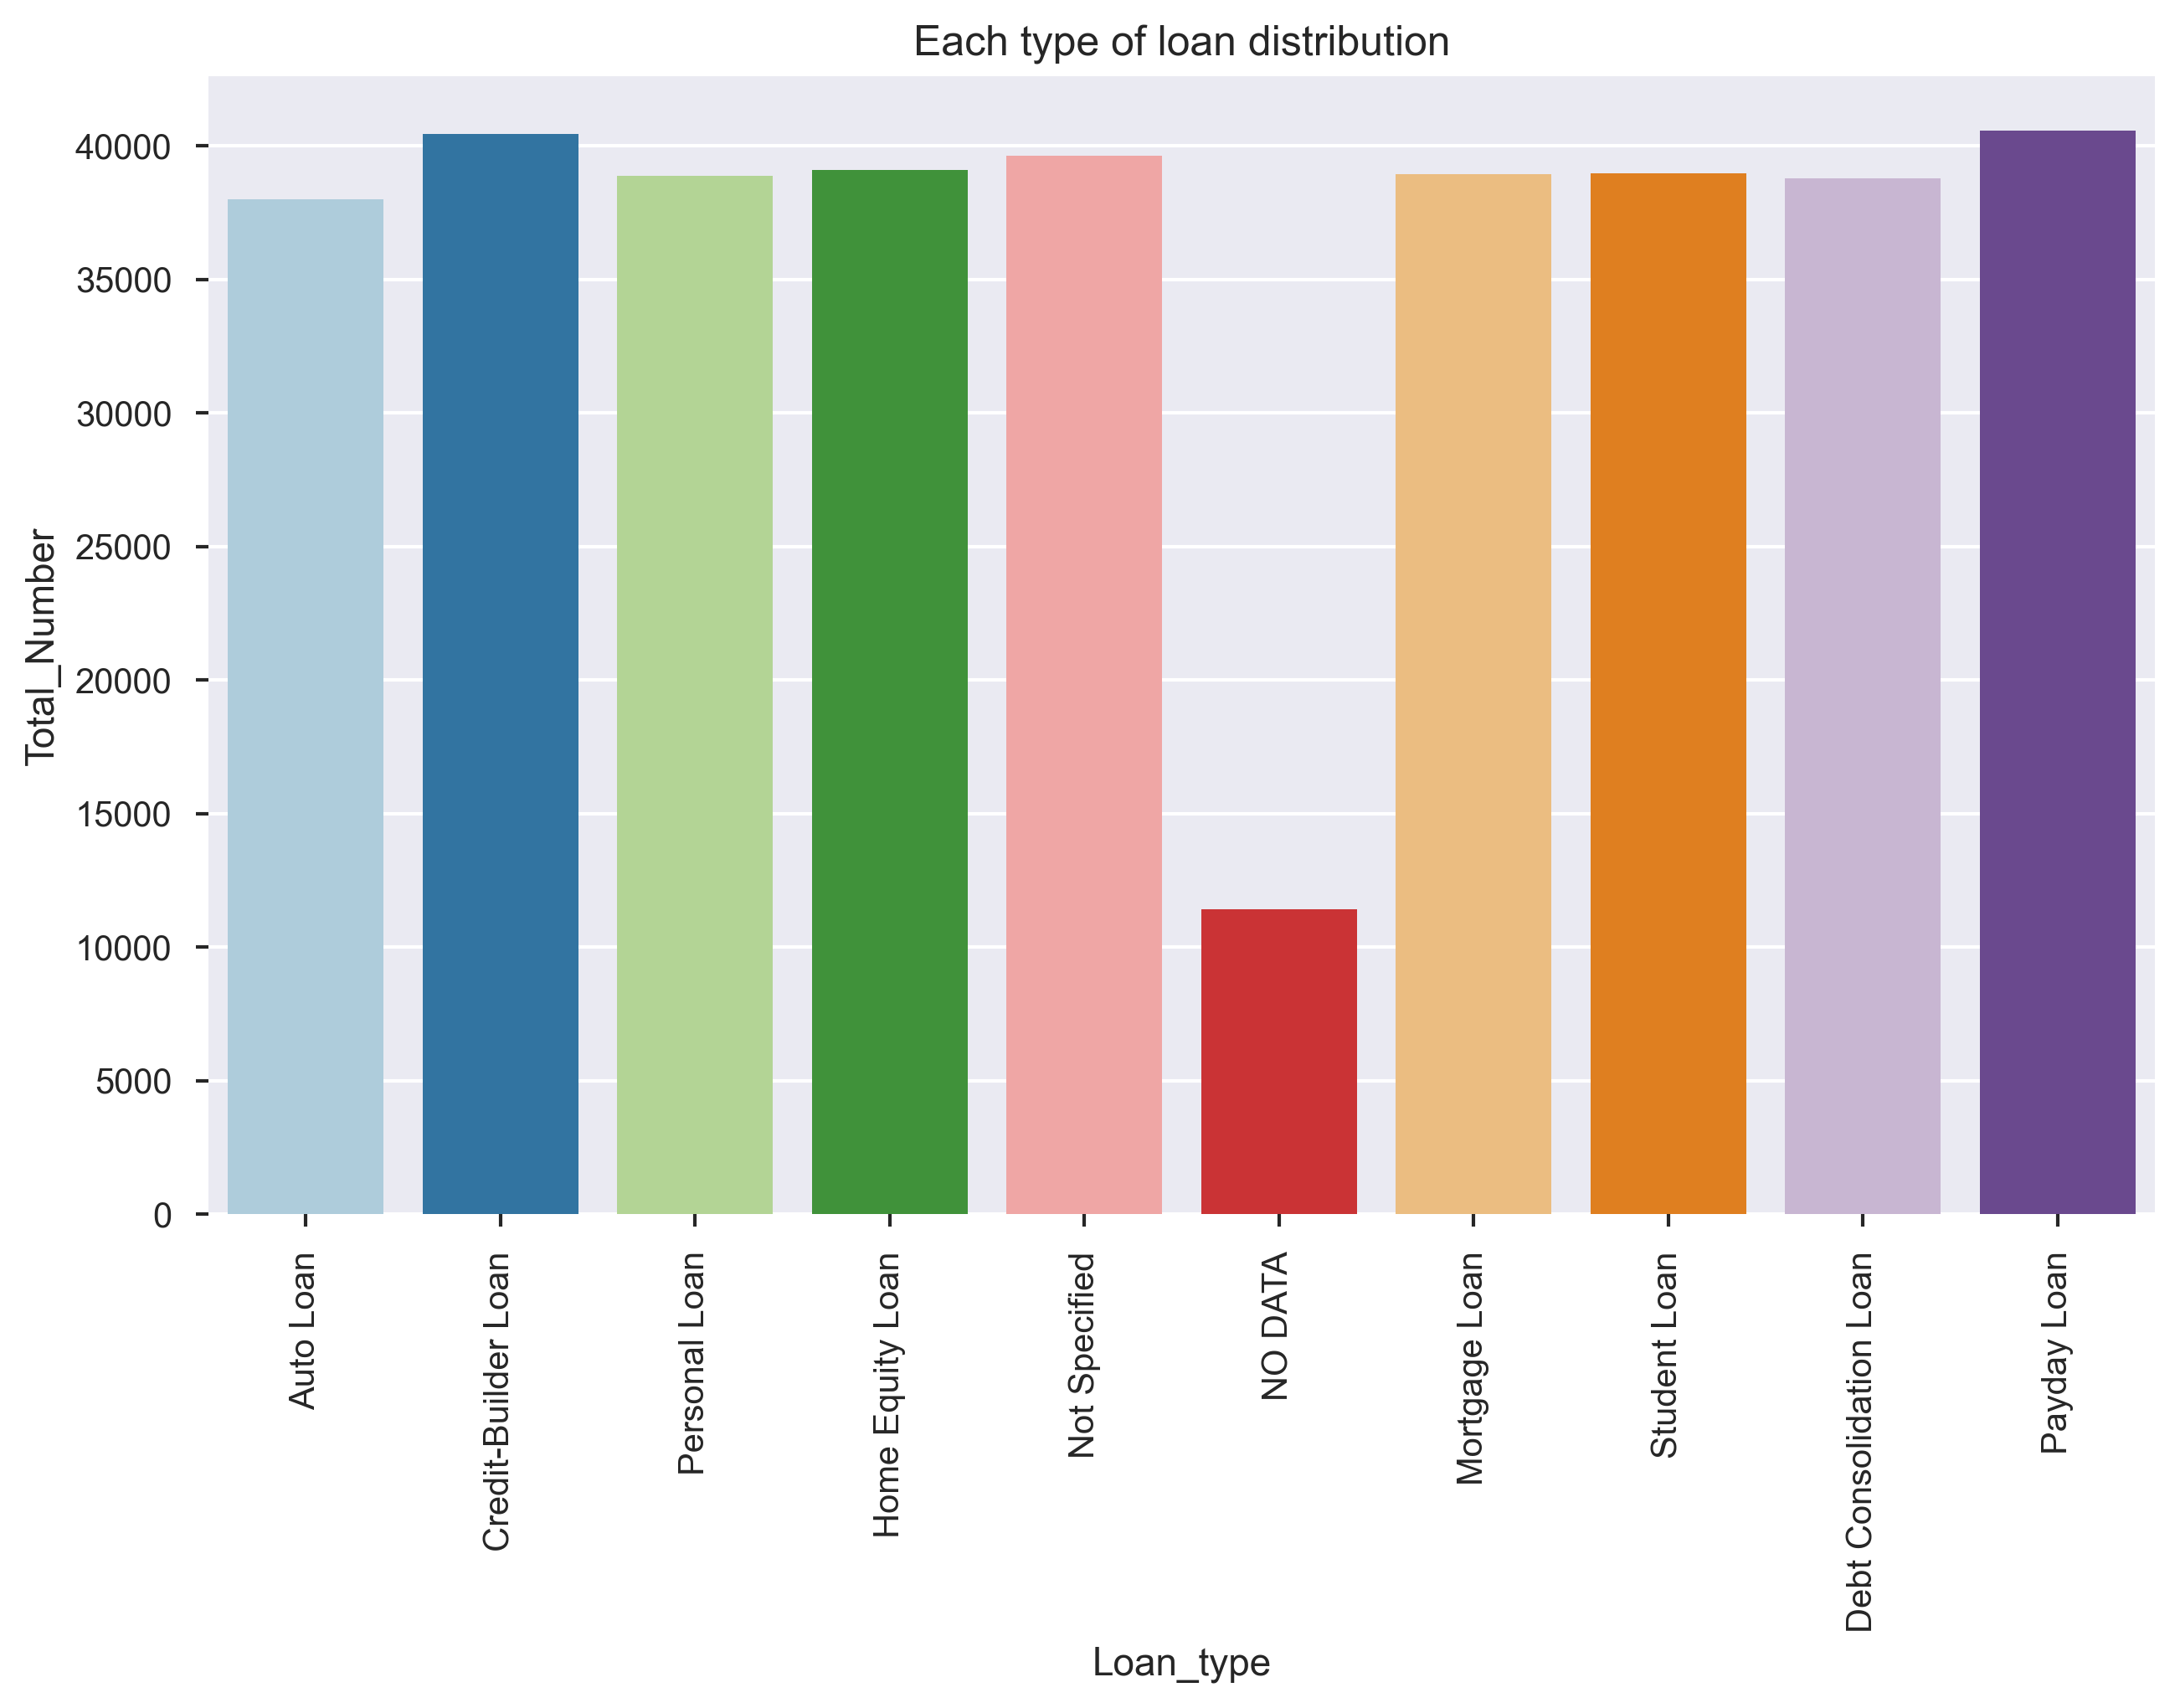

In [40]:
plt.figure(figsize=(10,6),dpi = 300)
plt.title("Each type of loan distribution")
plt.xticks(rotation = 90)
sns.barplot(data = total_num_of_each_loan, x = "Loan_type",y = "Total_Number",palette="Paired")
plt.show()


##### Count of Account of Payment Delay from due 
* Filter out count of accounts which have due days (date in days range)

In [41]:
pd.DataFrame(df["Delay_from_due_date"].value_counts())

,Delay_from_due_date
15.0,3596
13.0,3424
8.0,3324
14.0,3313
10.0,3281
...,...
59.0,528
39.0,525
43.0,502
37.0,490


In [42]:
print("Min_due_date",df["Delay_from_due_date"].min())
print("Max_due_date",df["Delay_from_due_date"].max())

Min_due_date 0.0
Max_due_date 62.0


In [43]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [44]:
account_delay_count = df["Delay_from_due_date"].value_counts()
Counts_of_accounts  = {}
x = 0

for i in range(len(account_delay_count)):
    x += account_delay_count[i]
    if i == 0:
        Counts_of_accounts["NO_Due_Days"] = x
        x=0
    elif i ==10 :
        Counts_of_accounts['1-10'] = x
        x = 0
    elif i==20:
        Counts_of_accounts['11-20'] = x
        x = 0
    elif i ==30:
        Counts_of_accounts['21-30'] = x
        x = 0
    elif i ==40:
        Counts_of_accounts['31-40'] = x
        x = 0
    elif i ==50:
        Counts_of_accounts['41-50'] = x
        x = 0
    elif i == 62:
        Counts_of_accounts['51-62'] = x
        x = 0
account_has_due_date = pd.DataFrame({"Days_range 10days_Interval":Counts_of_accounts.keys(),"Fault_account":Counts_of_accounts.values()})
account_has_due_date

,Days_range 10days_Interval,Fault_account
0,NO_Due_Days,1385
1,1-10,25728
2,11-20,29510
3,21-30,24269
4,31-40,6442
5,41-50,5735
6,51-62,6931


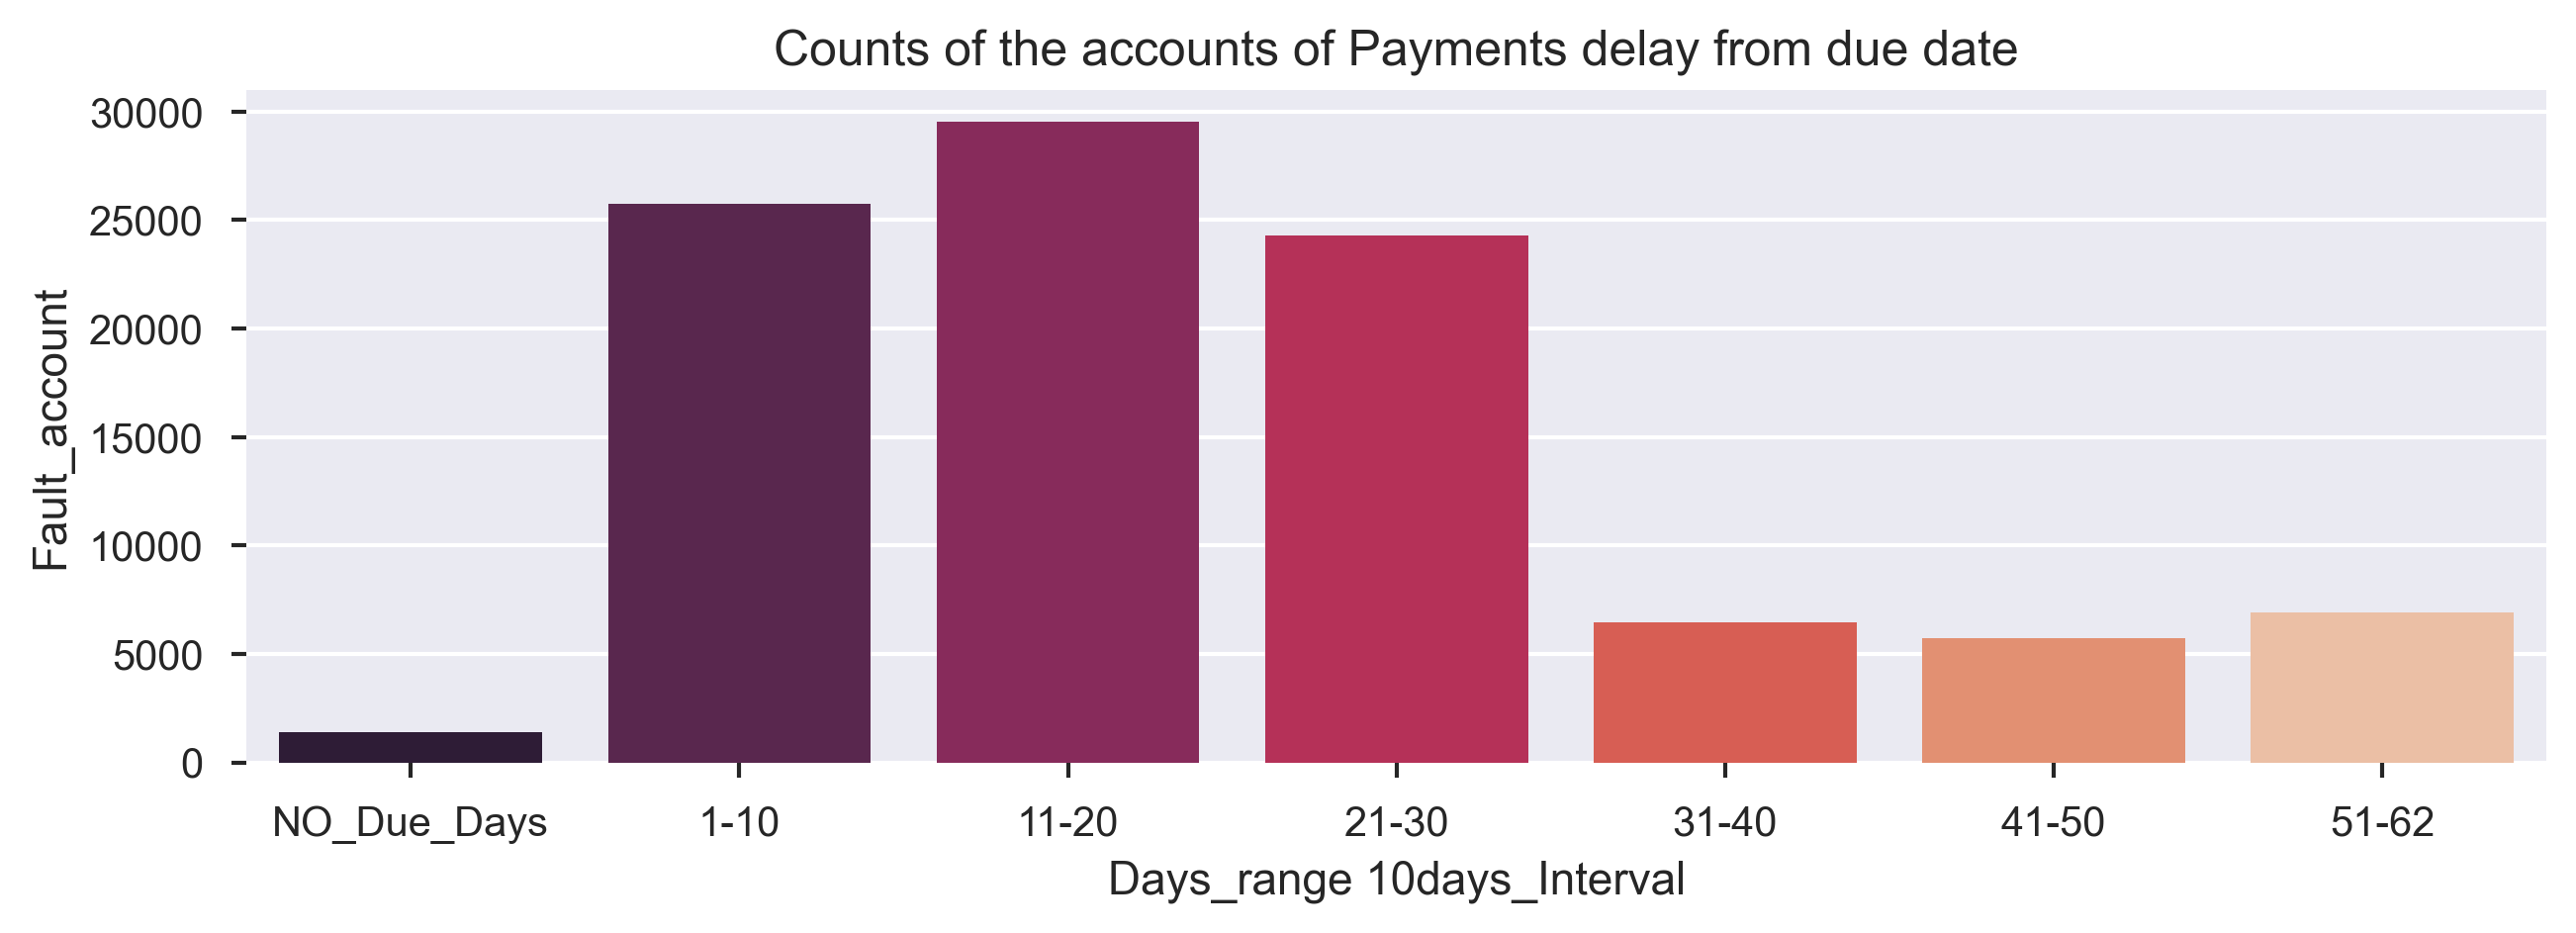

In [45]:
plt.figure(figsize=(10,3),dpi = 300)
plt.title("Counts of the accounts of Payments delay from due date")
sns.barplot(data=account_has_due_date, x = 'Days_range 10days_Interval',y = "Fault_account", palette="rocket")
plt.show()

##### Count of Accounts which have some payment delays
* filter out count of accounts which have payment delays

In [46]:
df["Num_of_Delayed_Payment"].value_counts()

19.0    5982
17.0    5832
10.0    5802
16.0    5768
15.0    5724
18.0    5668
20.0    5584
12.0    5493
9.0     5399
8.0     5300
11.0    5272
14.0    4503
13.0    4332
21.0    2717
7.0     2535
22.0    2495
6.0     2491
23.0    2304
5.0     2263
25.0    2241
0.0     2081
3.0     2074
2.0     2071
24.0    2045
1.0     2043
4.0     1981
Name: Num_of_Delayed_Payment, dtype: int64

In [47]:
print("Min Delay_Payment: ", df["Num_of_Delayed_Payment"].min())
print("Max Delay_Payment: ", df["Num_of_Delayed_Payment"].max())

Min Delay_Payment:  0.0
Max Delay_Payment:  25.0


In [48]:
payment_delay_accounts = df["Num_of_Delayed_Payment"].value_counts()
Counts_of_accounts = {}
x = 0

for i in range(len(payment_delay_accounts)):
    x += payment_delay_accounts[i]
    
    if i ==0 :
        Counts_of_accounts["NO DUE"] = x
        x = 0
    elif i==5:
        Counts_of_accounts['1-5'] = x
        x = 0
    elif i ==10:
        Counts_of_accounts['6-10'] = x
        x = 0
    elif i ==15:
        Counts_of_accounts['11-15'] = x
        x = 0
    elif i == 20:
        Counts_of_accounts['16-20'] = x
        x = 0
    elif i == 25:
        Counts_of_accounts['21-25'] = x
        x = 0
        
accounts_payment_delays = pd.DataFrame({'Payment_Delay_range':Counts_of_accounts.keys(),'Number_of_accounts':Counts_of_accounts.values()})
accounts_payment_delays

,Payment_Delay_range,Number_of_accounts
0,NO DUE,2081
1,1-5,10432
2,6-10,21527
3,11-15,25324
4,16-20,28834
5,21-25,11802


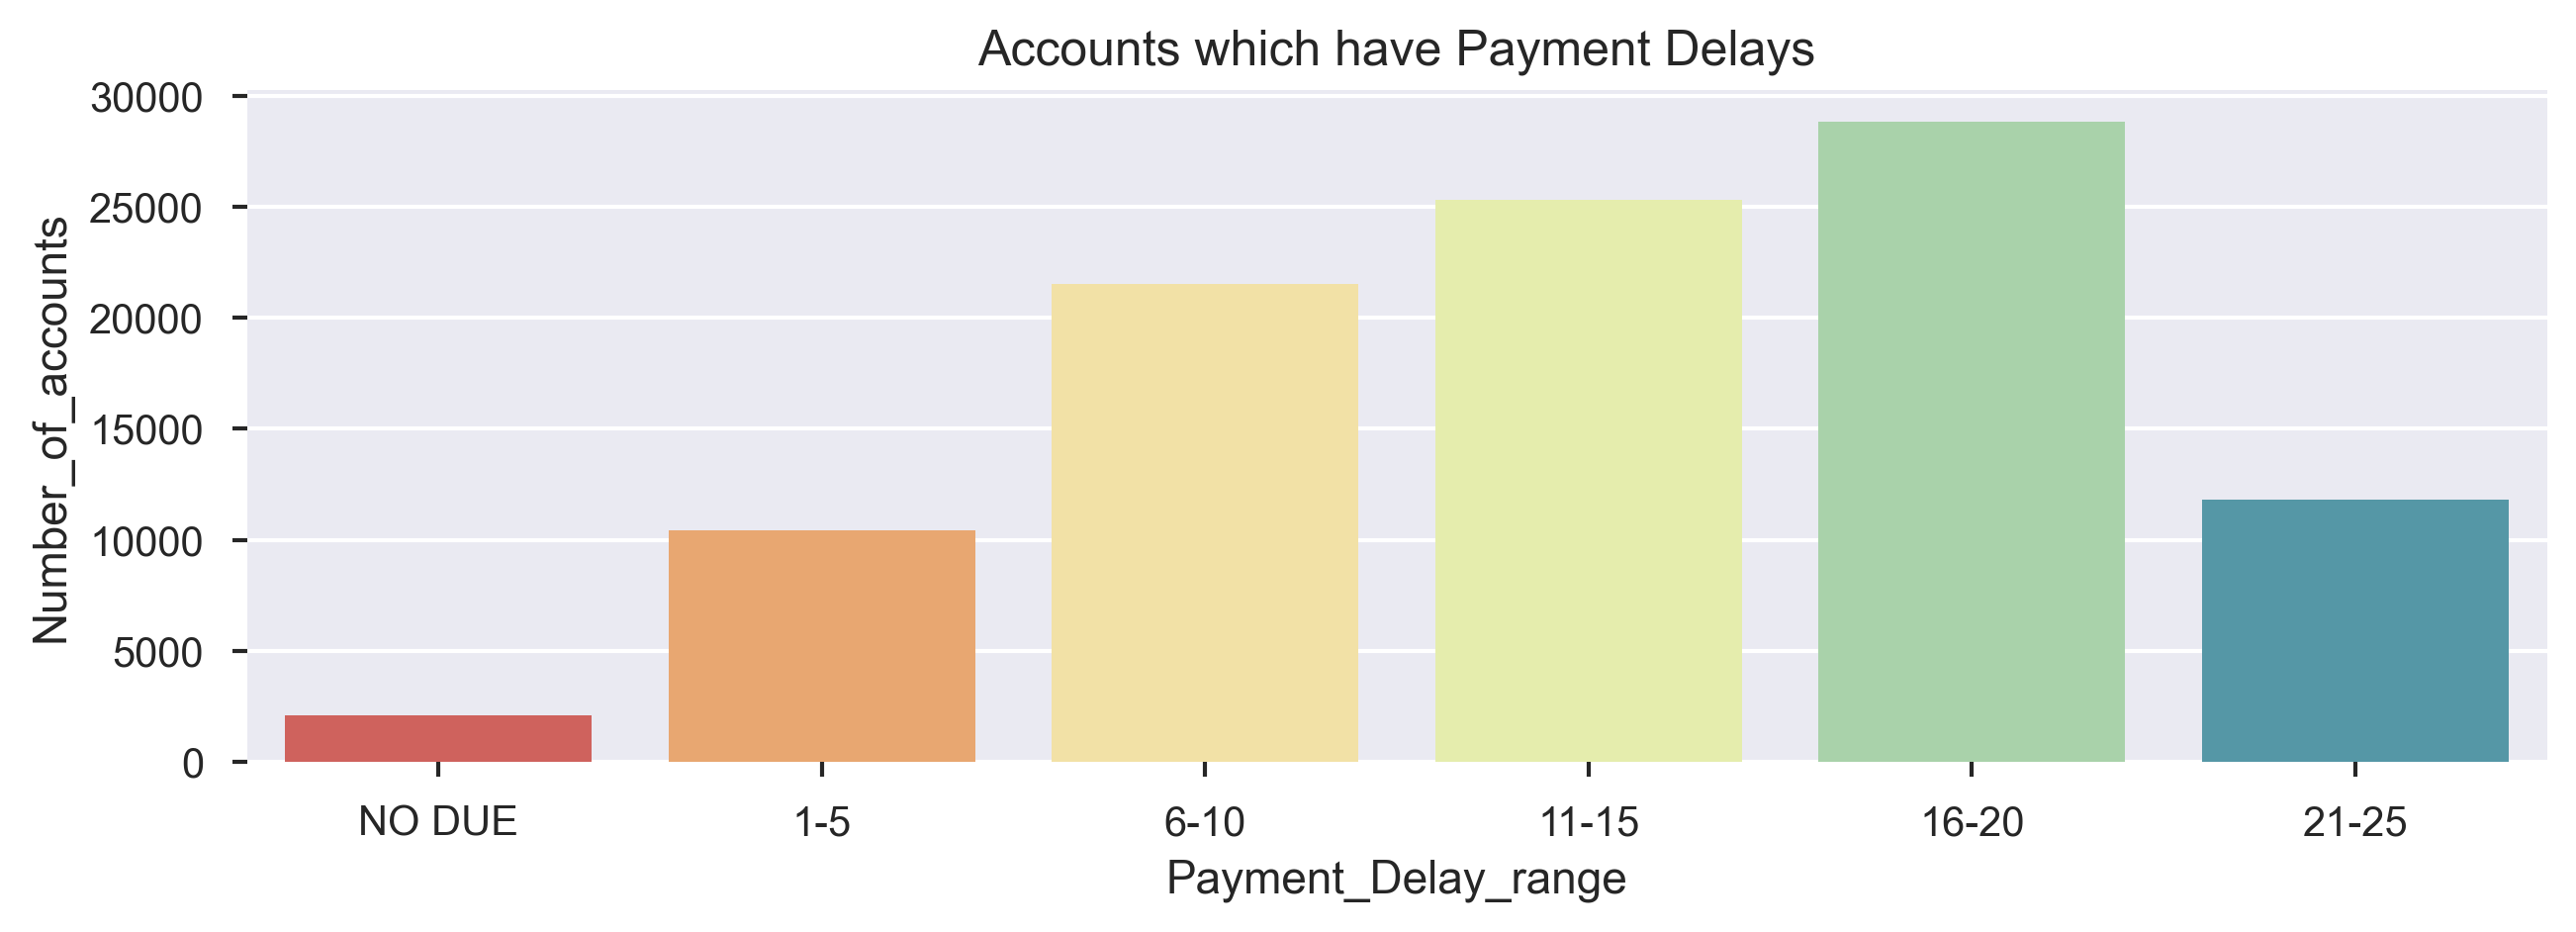

In [49]:
plt.figure(figsize=(10,3),dpi = 300)
plt.title("Accounts which have Payment Delays")
sns.barplot(data = accounts_payment_delays, x = "Payment_Delay_range",y = "Number_of_accounts",palette="Spectral")
plt.show()

# Classification Prepare Model Deploment

In [50]:
df.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [51]:
# drop the columns we not use in the model
df.drop(columns=["Customer_ID",],inplace = True)
df.drop(columns=["ID"],inplace = True)
df.drop(columns=["SSN"],inplace = True)
df.drop(columns=["Name"],inplace = True)
df.drop(columns=["Month"],inplace = True)

In [52]:
# check Target Feature for the classification
import seaborn as sns
import matplotlib.pyplot as plt

# the style parameter control property like color of the background and wheter a grid is enabled by default
sns.set_style("whitegrid", {'axes.grid': False})

#Environment setting
pd.set_option("display.float_format",lambda x:f'{x:3f}')

In [53]:
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.3.4


In [54]:
# pip install matplotlib --upgrade

<AxesSubplot:>

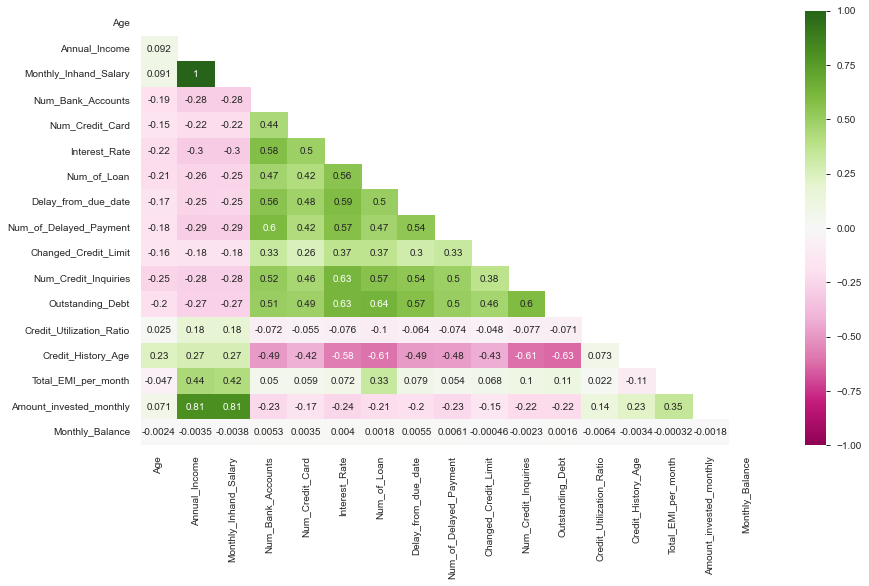

In [55]:
# Correlation between Numerical features
plt.figure(figsize=(14,8))
sns.heatmap(
    df.corr(), 
    mask=np.triu(np.ones_like(df.corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1, cmap="PiYG")

In [56]:
# save for the clean credit score classificaiton
# df.to_csv("clean_credit_score_classification.csv", index = False)

## Multi-class Classification Data Pre-Processing

In [57]:
pf.ProfileReport(df)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

# Superviseed Classifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from xgboost import XGBClassifier

# Supervised Classifier- metrix
from  sklearn.metrics import accuracy_score, recall_score, make_scorer, precision_score, f1_score,log_loss
from sklearn.metrics import classification_report, plot_confusion_matrix,confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve,average_precision_score

In [59]:
# supervised-Cross_validation-GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [60]:
import pickle
random_state = 30

In [61]:
df1 =df.copy()

In [62]:
df1

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.000000,Scientist,19114.120000,1824.843333,3.000000,4.000000,3.000000,4.000000,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.000000,...,Good,809.980000,26.822620,265.000000,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,23.000000,Scientist,19114.120000,1824.843333,3.000000,4.000000,3.000000,4.000000,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.000000,...,Good,809.980000,31.944960,266.000000,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,23.000000,Scientist,19114.120000,1824.843333,3.000000,4.000000,3.000000,4.000000,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.000000,...,Good,809.980000,28.609352,267.000000,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,23.000000,Scientist,19114.120000,1824.843333,3.000000,4.000000,3.000000,4.000000,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.000000,...,Good,809.980000,31.377862,268.000000,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,23.000000,Scientist,19114.120000,1824.843333,3.000000,4.000000,3.000000,4.000000,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.000000,...,Good,809.980000,24.797347,269.000000,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.000000,Mechanic,39628.990000,3359.415833,4.000000,6.000000,7.000000,2.000000,"Auto Loan, and Student Loan",23.000000,...,Good,502.380000,34.663572,378.000000,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,25.000000,Mechanic,39628.990000,3359.415833,4.000000,6.000000,7.000000,2.000000,"Auto Loan, and Student Loan",18.000000,...,Good,502.380000,40.565631,379.000000,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,25.000000,Mechanic,39628.990000,3359.415833,4.000000,6.000000,7.000000,2.000000,"Auto Loan, and Student Loan",27.000000,...,Good,502.380000,41.255522,380.000000,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,25.000000,Mechanic,39628.990000,3359.415833,4.000000,6.000000,7.000000,2.000000,"Auto Loan, and Student Loan",20.000000,...,Good,502.380000,33.638208,381.000000,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Type_of_Loan              100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

In [64]:
df.describe(include='all')

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000.000000,...,100000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000,100000.000000,100000
unique,nan,15,nan,nan,nan,nan,nan,nan,6261,nan,...,3,nan,nan,nan,3,nan,nan,6,nan,3
top,nan,Lawyer,nan,nan,nan,nan,nan,nan,NO DATA,nan,...,Standard,nan,nan,nan,Yes,nan,nan,Low_spent_Small_value_payments,nan,Standard
freq,nan,7096,nan,nan,nan,nan,nan,nan,11408,nan,...,45848,nan,nan,nan,52326,nan,nan,28271,nan,53174
mean,33.316340,NaN,50505.123449,4197.270835,5.368610,5.533570,14.532080,3.532880,NaN,21.081410,...,NaN,1426.220376,32.285173,221.220460,NaN,107.699208,55.101315,NaN,-33333333333333331935232.000000,NaN
std,10.764812,NaN,38299.422093,3186.432497,2.593789,2.067098,8.741330,2.446356,NaN,14.804560,...,NaN,1155.129026,5.116875,99.680716,NaN,132.267056,39.006932,NaN,3333183328455227879718912.000000,NaN
min,14.000000,NaN,7005.930000,303.645417,-1.000000,0.000000,1.000000,0.000000,NaN,0.000000,...,NaN,0.230000,20.000000,1.000000,NaN,0.000000,0.000000,NaN,-333333333333333314856026112.000000,NaN
25%,24.000000,NaN,19342.972500,1626.594167,3.000000,4.000000,7.000000,2.000000,NaN,10.000000,...,NaN,566.072500,28.052567,144.000000,NaN,29.268886,27.959111,NaN,267.611832,NaN
50%,33.000000,NaN,36999.705000,3095.905000,5.000000,5.000000,13.000000,3.000000,NaN,18.000000,...,NaN,1166.155000,32.305784,219.000000,NaN,66.462304,45.156550,NaN,333.860260,NaN
75%,42.000000,NaN,71683.470000,5957.715000,7.000000,7.000000,20.000000,5.000000,NaN,28.000000,...,NaN,1945.962500,36.496663,302.000000,NaN,147.392573,71.295797,NaN,463.215683,NaN


#### Test | Train split

In [65]:
x = df.drop(columns="Credit_Score")
y = df["Credit_Score"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=random_state)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((80000, 22), (20000, 22), (80000,), (20000,))

In [66]:
x_train.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [67]:
x_train["Type_of_Loan"] 

90776                                              NO DATA
4160     Student Loan, Home Equity Loan, Personal Loan,...
21104    Student Loan, Credit-Builder Loan, Student Loa...
35830                                              NO DATA
75213                                            Auto Loan
                               ...                        
46220                     Not Specified, and Not Specified
98804              Mortgage Loan, Auto Loan, and Auto Loan
48045                     Not Specified, and Personal Loan
70053                                              NO DATA
38693    Payday Loan, Debt Consolidation Loan, and Payd...
Name: Type_of_Loan, Length: 80000, dtype: object

#### Dummy Operation

In [68]:
x_train = x_train.join(x_train["Type_of_Loan"].str.get_dummies(sep = ",").add_prefix("tol_"))
x_test = x_test.join(x_test["Type_of_Loan"].str.get_dummies(sep = ",").add_prefix("tol_"))
x_test = x_test.reindex(columns = x_train.columns, fill_value=0) # "0"

x_train.drop(columns=["Type_of_Loan"], inplace = True)
x_test.drop(columns=["Type_of_Loan"], inplace = True)

x_train.shape, x_test.shape

((80000, 49), (20000, 49))

In [69]:
x_train.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,tol_Auto Loan,tol_Credit-Builder Loan,tol_Debt Consolidation Loan,tol_Home Equity Loan,tol_Mortgage Loan,tol_NO DATA,tol_Not Specified,tol_Payday Loan,tol_Personal Loan,tol_Student Loan
90776,42.000000,Lawyer,35469.720000,2833.810000,3.000000,4.000000,10.000000,0.000000,15.000000,13.000000,...,0,0,0,0,0,1,0,0,0,0
4160,30.000000,Developer,56131.480000,4946.623333,0.000000,4.000000,10.000000,4.000000,13.000000,12.000000,...,0,0,0,0,0,0,0,0,0,1
21104,37.000000,Media_Manager,15659.240000,1549.936667,7.000000,9.000000,15.000000,6.000000,26.000000,23.000000,...,0,0,0,0,0,0,0,0,0,1
35830,51.000000,Media_Manager,31534.940000,2426.911667,5.000000,6.000000,1.000000,0.000000,3.000000,0.000000,...,0,0,0,0,0,1,0,0,0,0
75213,37.000000,Lawyer,113561.200000,9580.433333,8.000000,4.000000,9.000000,1.000000,21.000000,18.000000,...,1,0,0,0,0,0,0,0,0,0


#### OneHotEncoder and LabelEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat = x_train.select_dtypes(exclude="number").columns.to_list()    
enco = OneHotEncoder(handle_unknown="ignore", sparse=False)

x_train_cat = pd.DataFrame(
    enco.fit_transform(x_train[cat]), index = x_train.index, 
    columns = enco.get_feature_names_out(cat)
)    
x_test_cat  = pd.DataFrame(
    enco.transform(x_test[cat]), index = x_test.index, 
    columns = enco.get_feature_names_out(cat)
)    
x_train_enco = X_train_cat.join(X_train.select_dtypes("number"))
x_test_enco = X_test_cat.join(X_test.select_dtypes("number"))

x_train_enco.shape, X_test_enco.shape

In [ ]:
#pip install -U scikit-learn